# Data Exploration

This file is to analyse the data to see what kind of data preperation might be need to improve the training data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [2]:
# Define the data files
brand_data_file = 'data/brand_data_sanitised.csv'
user_data_file = 'data/user_data_sanitised.csv'
interaction_data_file = 'data/interaction_data_sanitised.csv'

# Import data files into dataframes
brand_dataframe = pd.read_csv(brand_data_file)
user_dataframe = pd.read_csv(user_data_file)
interaction_dataframe = pd.read_csv(interaction_data_file)

### Brand data exploration

Use a correlation heatmap to explore the correlation of features.

**Observations:**

- Social media channels are heavily correlated so these could be merged into a single feature 'HAS_SOCIAL_MEDIA' if any single feature is TRUE.
- There is a strong correlaton between total press releases and total products, we probably only need to include one of these (products) features.

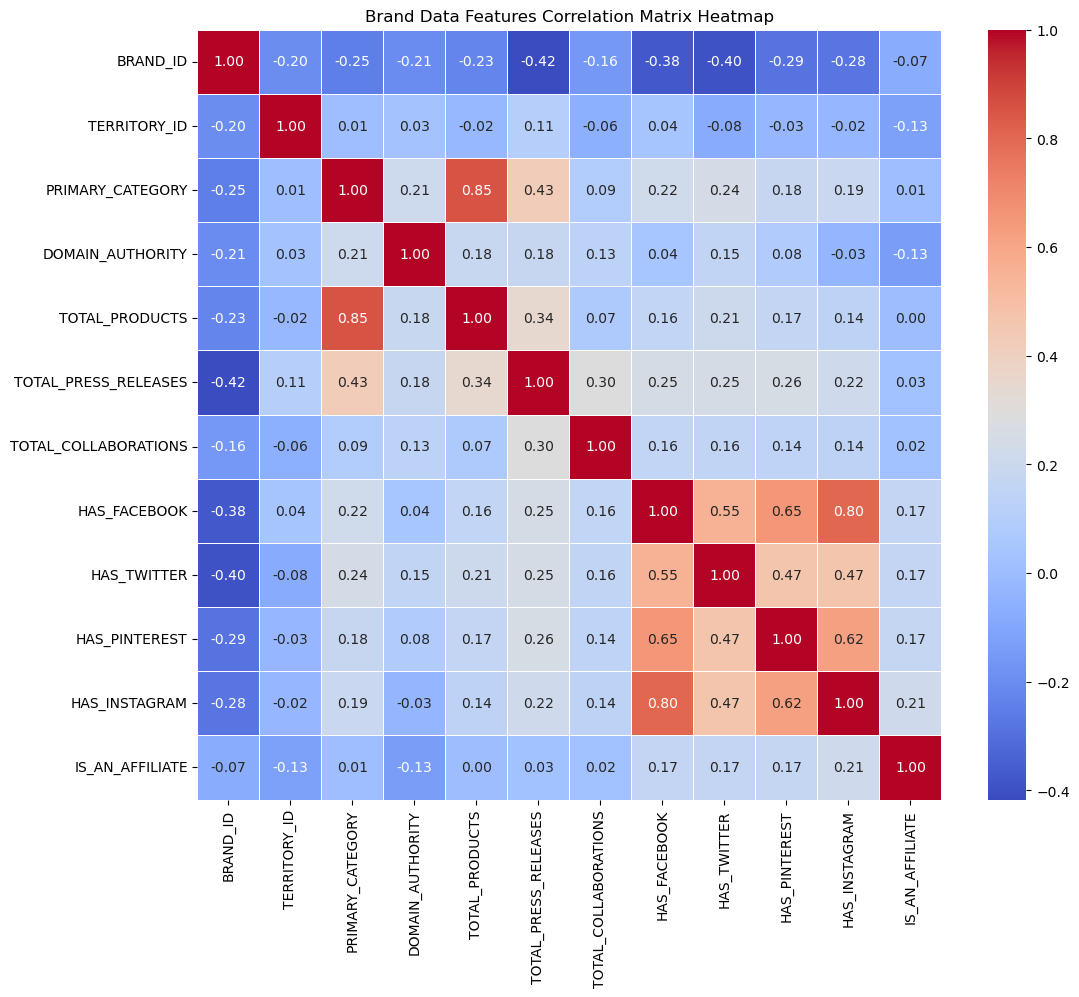

In [3]:
# Compute the correlation matrix
correlation_matrix = brand_dataframe.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Brand Data Features Correlation Matrix Heatmap')
plt.show()

### User data exploration

Use a correlation heatmap to explore the correlation of features.

**Observations:**

- Social media channels are heavily correlated so these could be merged into a single feature 'HAS_SOCIAL_MEDIA' if any single feature is TRUE.

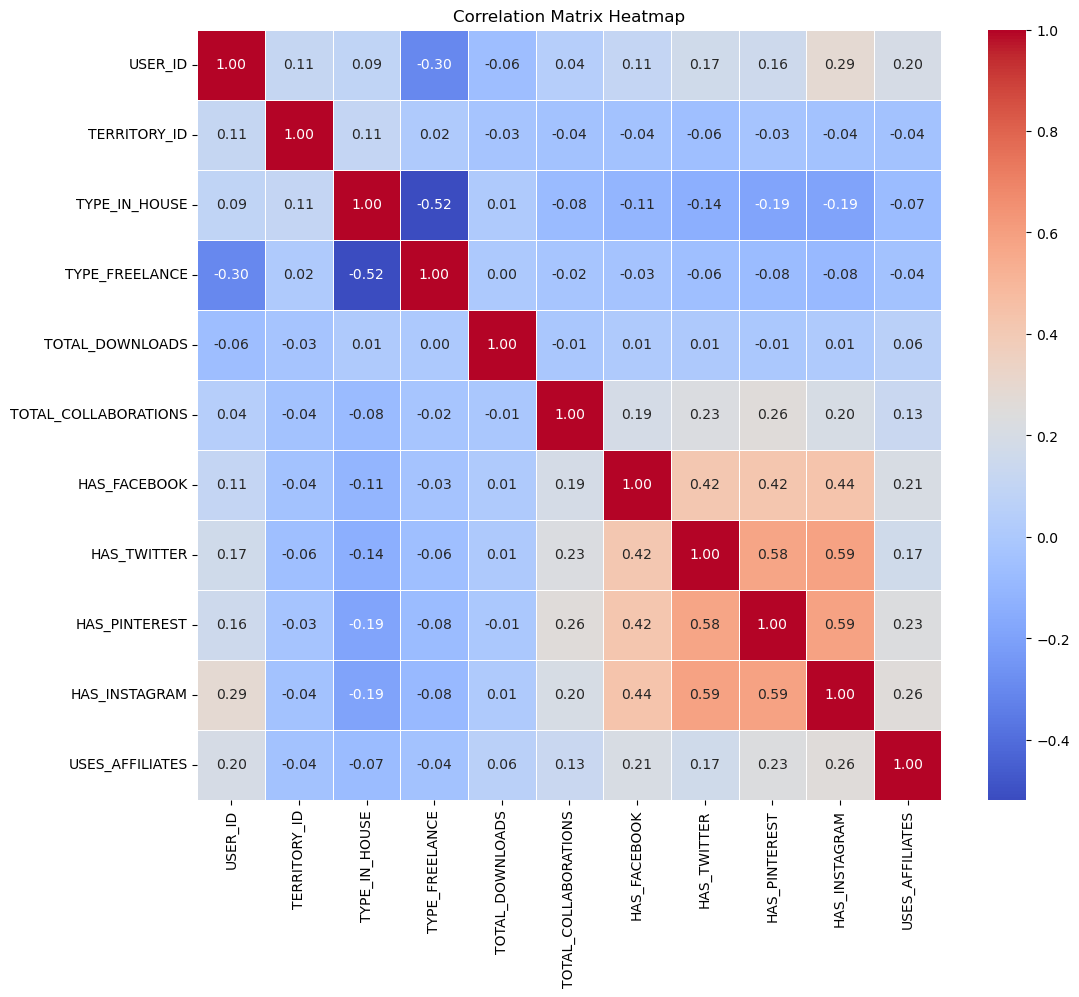

In [4]:
# Compute the correlation matrix
correlation_matrix = user_dataframe.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Interaction data exploration

Use a plot to see the distribution of total interactions.

**Observations:**

- The data is extreamly skewd towards the lower end of interactions.
- Even after removing the large outliers (interactions over 100) we still have a large skew.
- We attempt to improve the distribution using Box-Cox and normalise the data.
- After transformation we get a slightly better distribution but it is still skewed.  I will use this approach during data preperation along with weighting of the interaction scores.  I will weight the scores after normalisation due to the skewness of the data.

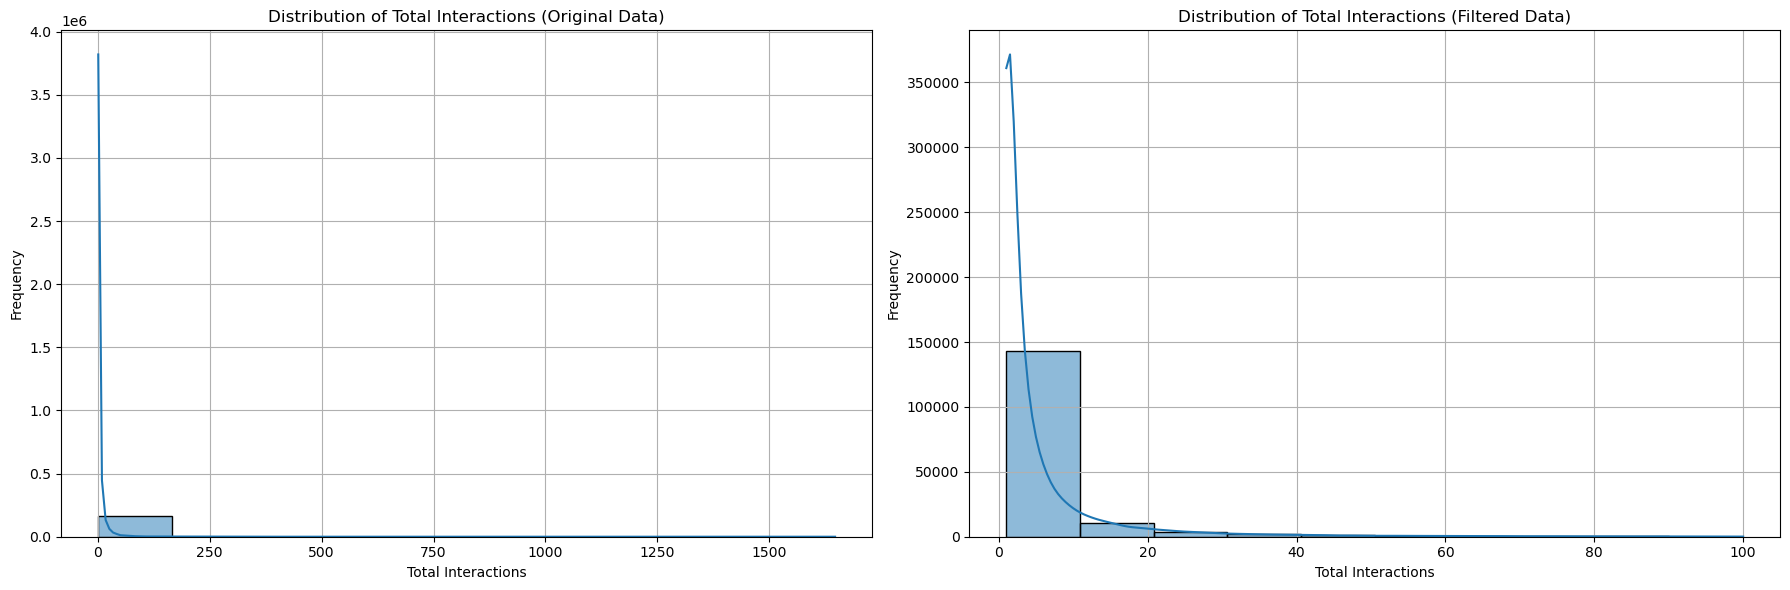

In [5]:

# Filter the DataFrame
filtered_dataframe = interaction_dataframe[interaction_dataframe['TOTAL_INTERACTIONS'] <= 100].copy()

# Create subplots for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Distribution of total interactions in the original data
sns.histplot(interaction_dataframe['TOTAL_INTERACTIONS'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Total Interactions (Original Data)')
axes[0].set_xlabel('Total Interactions')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Plot 2: Distribution of total interactions in the filtered data
sns.histplot(filtered_dataframe['TOTAL_INTERACTIONS'], bins=10, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Total Interactions (Filtered Data)')
axes[1].set_xlabel('Total Interactions')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

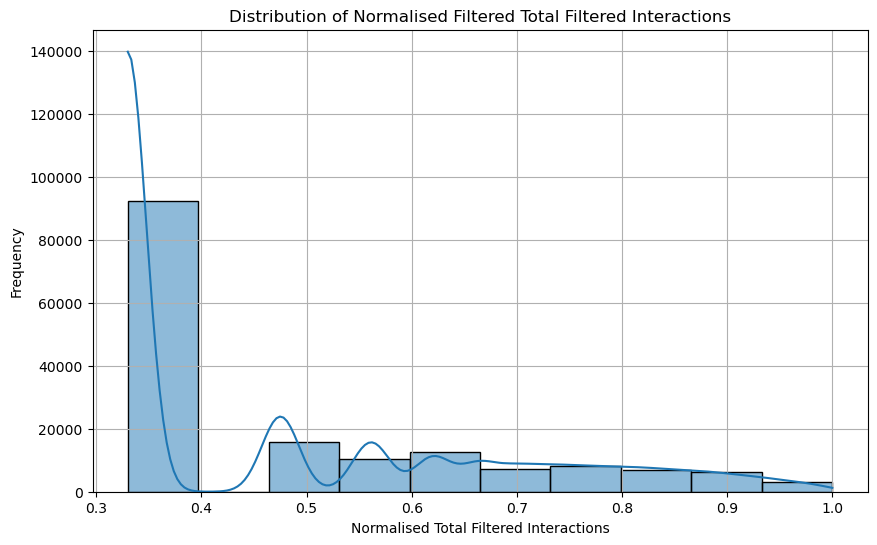

In [6]:
# Apply Box-Cox transformation
total_interactions_boxcox, fitted_lambda = stats.boxcox(filtered_dataframe['TOTAL_INTERACTIONS'])

# Assign the transformed values using .loc to avoid SettingWithCopyWarning
filtered_dataframe.loc[:, 'TOTAL_INTERACTIONS_BOXCOX'] = total_interactions_boxcox

# Normalize the Box-Cox values and assign using .loc
filtered_dataframe.loc[:, 'TOTAL_INTERACTIONS_BOXCOX_NORMALISED'] = MinMaxScaler().fit_transform(filtered_dataframe[['TOTAL_INTERACTIONS_BOXCOX']])

# Find the minimum non-zero value
min_non_zero_value = filtered_dataframe.loc[filtered_dataframe['TOTAL_INTERACTIONS_BOXCOX_NORMALISED'] > 0, 'TOTAL_INTERACTIONS_BOXCOX_NORMALISED'].min()

# Replace zero values with the minimum non-zero value using .loc
filtered_dataframe.loc[filtered_dataframe['TOTAL_INTERACTIONS_BOXCOX_NORMALISED'] == 0, 'TOTAL_INTERACTIONS_BOXCOX_NORMALISED'] = min_non_zero_value

# Display the distribution of transformed and normalised total interactions between a user and brand
plt.figure(figsize=(10, 6))
sns.histplot(filtered_dataframe['TOTAL_INTERACTIONS_BOXCOX_NORMALISED'], bins=10, kde=True)
plt.title('Distribution of Normalised Filtered Total Filtered Interactions')
plt.xlabel('Normalised Total Filtered Interactions')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()